In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
%matplotlib inline

C:\Users\16kat\OneDrive\Documents\Spring 2020\AMATH 563
C:\Users\16kat\OneDrive\Documents\Spring 2020\AMATH 563\CroppedYale


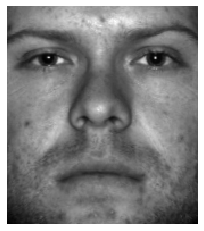

512


In [4]:

script_dir = os.path.dirname(os.path.realpath('__file__')) #<-- absolute dir the script is in
print(script_dir)
rel_path = "CroppedYale"
abs_file_path = os.path.join(script_dir, rel_path)

print(abs_file_path)
cropped_faces = []
labels = []
female_faces = []
male_faces = []

for fname in os.listdir(abs_file_path):
    if fname in ['yaleB05', 'yaleB15', 'yaleB22', 'yaleB27', 'yaleB28', 'yaleB32', 'yaleB34', 'yaleB37']:
        female = True
    else:
        female = False
    for fname2 in os.listdir(os.path.join(script_dir, rel_path, fname)):
        img = np.array(Image.open(os.path.join(script_dir, rel_path, fname, fname2)))
        cropped_faces.append((img.T).reshape(192*168))
        if (female):
            labels.append(1)
            female_faces.append((img.T).reshape(192*168))
        else:
            labels.append(0)
            male_faces.append((img.T).reshape(192*168))

        
        
# print(np.array(cropped_faces).shape)
cropped_faces = np.array(cropped_faces)
labels = np.array(labels)
# print(faces.shape)
# print(labels.shape)
# print(cropped_faces.shape)



face = np.reshape(cropped_faces[0,:],(168,192)).T
img = plt.imshow(face)
img.set_cmap('gray')
plt.axis('off')
plt.show()



n_female = len(female_faces)
print(n_female)
faces_sorted = np.array(np.concatenate((female_faces, male_faces)))

C:\Users\16kat\OneDrive\Documents\Spring 2020\AMATH 563
C:\Users\16kat\OneDrive\Documents\Spring 2020\AMATH 563\yalefaces
(77760, 165)


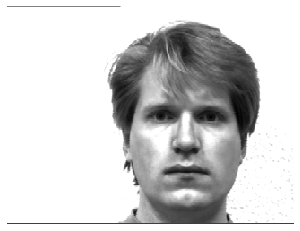

In [5]:
from PIL import Image
import os
script_dir = os.path.dirname(os.path.realpath('__file__')) #<-- absolute dir the script is in
print(script_dir)
rel_path = "yalefaces"
abs_file_path = os.path.join(script_dir, rel_path)

print(abs_file_path)

faces = []

for fname in os.listdir(abs_file_path):
    img = np.array(Image.open(os.path.join(script_dir, rel_path, fname)))
    faces.append((img).reshape(243 *320))
        
faces = np.array(faces).T
print(faces.shape)



face = np.reshape(faces[:,4],(243, 320))
img = plt.imshow(face)
img.set_cmap('gray')
plt.axis('off')
plt.show()

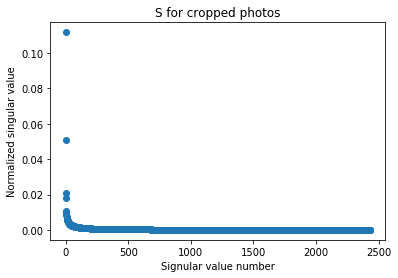

(32256, 2432)


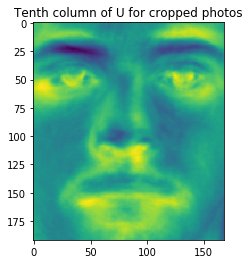

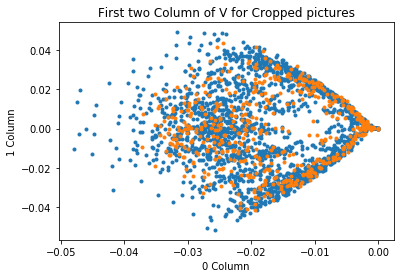

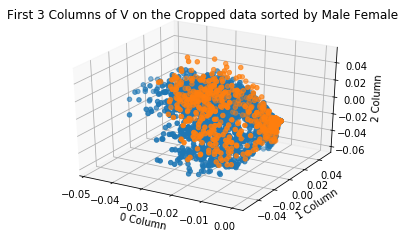

In [22]:
%matplotlib inline
#for the cropped photos
# print(faces.shape)
U, S_cropped, VT = np.linalg.svd(faces_sorted.T,full_matrices=0)

plt.plot(S/ (sum(S)), 'o')
plt.title("S for cropped photos")
plt.xlabel('Signular value number')
plt.ylabel("Normalized singular value")
plt.show()

print(U.shape)
face = np.reshape(U[:,10],((168,192))).T
# plt.plot(face)
plt.imshow(face)
plt.title('Tenth column of U for cropped photos')
plt.show()

V = np.transpose(VT)

plt.plot(V[n_female:, 0], V[n_female:,1], '.')
plt.plot(V[:n_female, 0], V[:n_female, 1], '.')
# plt.imshow(face)
plt.xlabel("0 Column")
plt.ylabel("1 Column")
plt.title("First two Column of V for Cropped pictures")
plt.show()

# %matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(V[n_female:, 0], V[n_female:, 1], V[n_female:, 2])
ax.scatter(V[:n_female, 0], V[:n_female, 1], V[:n_female, 2])
ax.set_xlabel("0 Column")
ax.set_ylabel("1 Column")
ax.set_zlabel("2 Column")
ax.set_title("First 3 Columns of V on the Cropped data sorted by Male Female")

plt.show()


(2432,)
(32256, 2432)


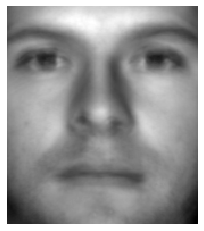

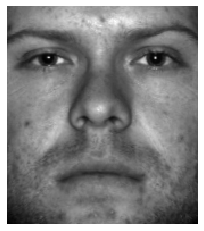

In [53]:
# U, S, VT = np.linalg.svd(cropped_faces.T,full_matrices=0)
print(S.shape)
rank = 30
face = np.matmul(np.matmul(U[:,:rank], np.diag(S[:rank])), VT[:rank, :])
print(face.shape)
face = np.reshape(face[:,0],(168,192)).T
img = plt.imshow(face)
img.set_cmap('gray')
plt.axis('off')
plt.show()

face = np.reshape(cropped_faces[0,:],(168,192)).T
img = plt.imshow(face)
img.set_cmap('gray')
plt.axis('off')
plt.show()


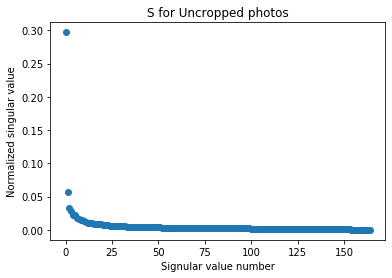

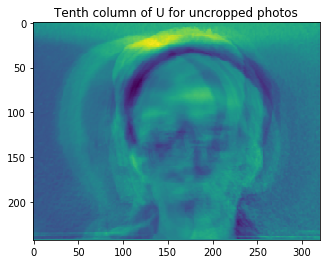

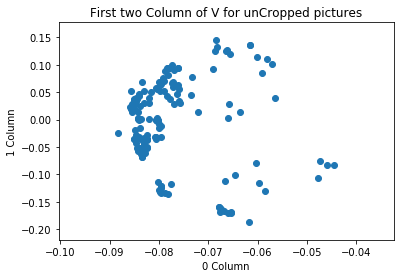

In [26]:
#for the uncropped photos
# print(faces.shape)
U, S_uncropped, VT = np.linalg.svd(faces,full_matrices=0)

plt.plot(S/ (sum(S)), 'o')
plt.title("S for Uncropped photos")
plt.xlabel('Signular value number')
plt.ylabel("Normalized singular value")
plt.show()

face = np.reshape(U[:,10],((243, 320)))
# plt.plot(face)
plt.imshow(face)
plt.title('Tenth column of U for uncropped photos')
plt.show()

V = np.transpose(VT)
# face = np.reshape(V[:,0],((168,192))).T
# plt.plot(V[:,0])
# # plt.imshow(face)
# plt.title("V")
# plt.show()
plt.scatter(V[:, 0], V[:, 1])
# plt.imshow(face)
plt.xlabel("0 Column")
plt.ylabel("1 Column")
plt.title("First two Column of V for unCropped pictures")
plt.show()

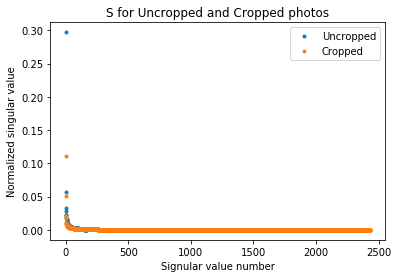

In [28]:
# U, S_cropped, VT = np.linalg.svd(faces_sorted.T,full_matrices=0)
# U, S_uncropped, VT = np.linalg.svd(faces,full_matrices=0)
plt.plot(S_uncropped/ (sum(S_uncropped)), '.')
plt.plot(S_cropped/ (sum(S_cropped)), '.')
plt.legend(["Uncropped", "Cropped"])
plt.title("S for Uncropped and Cropped photos")
plt.xlabel('Signular value number')
plt.ylabel("Normalized singular value")
plt.show()

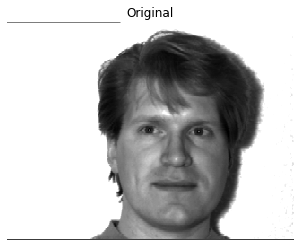

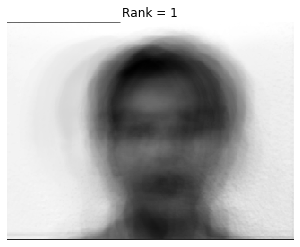

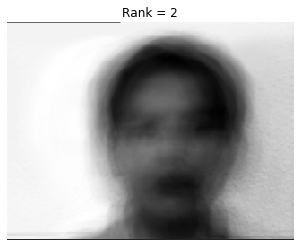

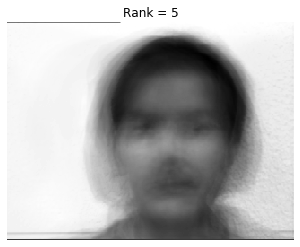

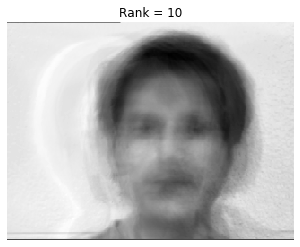

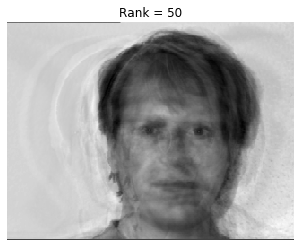

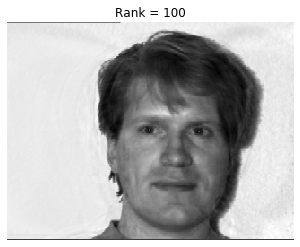

ValueError: x and y must have same first dimension, but have shapes (6,) and (0,)

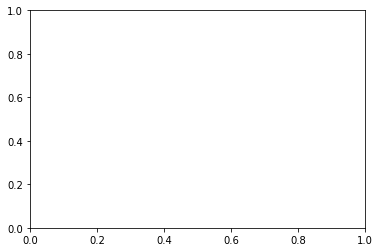

In [71]:
# U1, S1, VT1 = np.linalg.svd(faces.T,full_matrices=0)
# U2, S2, VT2 = np.linalg.svd(cropped_faces.T,full_matrices=0)
# print(S.shape)
error_list1 = []
error_list2 = []
rank_list = [1, 2, 5, 10,  50, 100]
face = np.reshape(faces[:,0],(243, 320))
img = plt.imshow(face)
img.set_cmap('gray')
plt.title("Original")
plt.axis('off')
plt.show()
for rank in rank_list:
# rank = 80
    new_faces = np.matmul(np.matmul(U1[:,:rank], np.diag(S1[:rank])), VT1[:rank, :]).T
    error = np.linalg.norm(new_faces - faces, ord = 2) / np.linalg.norm(faces, ord = 2)
    error_list1.append(error)
#     new_faces = np.matmul(np.matmul(U2[:,:rank], np.diag(S2[:rank])), VT2[:rank, :]).T
#     error = np.linalg.norm(new_faces - cropped_faces, ord = 2) / np.linalg.norm(cropped_faces, ord = 2)
#     error_list2.append(error)
    
    face = np.reshape(new_faces[:,0],(243, 320))
    img = plt.imshow(face)
    img.set_cmap('gray')
    plt.title("Rank = " + str(rank))
    plt.axis('off')
    plt.show()

    

#     print(error)
#     print(new_faces.shape)
#     print(faces.shape)

plt.plot(rank_list, error_list2, 'o')
plt.plot(rank_list, error_list1, 'o')

plt.legend(["Cropped", "Uncropped"])
plt.xlabel("Rank")
plt.ylabel("Error")
plt.title("Error of varying rank of Cropped and Uncropped images")
plt.show()

# face = np.reshape(face[0,:],(243, 320))
# img = plt.imshow(face)
# img.set_cmap('gray')
# plt.axis('off')
# plt.show()

# face = np.reshape(faces[:,4],(243, 320))
# img = plt.imshow(face)
# img.set_cmap('gray')
# plt.axis('off')
# plt.show()

In [88]:
#percent per mode
print("Upcropped")
print(S1[0]/sum(S1))
print(sum(S1[:10])/sum(S1))
print(sum(S1[:50]/sum(S1)))
print(sum(S1[:100]/sum(S1)))

print(("Cropped"))
print(S2[0]/sum(S2))
print(sum(S2[:10])/sum(S2))
print(sum(S2[:50]/sum(S2)))
print(sum(S2[:100]/sum(S2)))
print(sum(S2[:200]/sum(S2)))
# print(S1[:100])

Upcropped
0.2971125581156746
0.5230191265511419
0.7768961545030527
0.9159392695217954
Cropped
0.11175691375138534
0.25466770236973957
0.4116779028747471
0.5093143241992837
0.6195193534178411
